In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("Sleep_Efficiency.csv")
df = df.drop(columns=[c for c in ["ID","Bedtime","Wakeup time","Smoking status"] if c in df.columns])
df = pd.get_dummies(df, columns=["Gender"], drop_first=True, dtype=int)
df.head()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Male
0,65,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,0
1,69,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,1
2,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,0
3,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,0
4,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1


In [3]:
X = df.drop("Gender_Male", axis=1)
y = df["Gender_Male"]

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [4]:
clf = RandomForestClassifier()
clf.fit(X_train_s, y_train)

y_pred = clf.predict(X_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nКласифікаційний звіт:\n", classification_report(y_test, y_pred))

Accuracy: 0.8241758241758241

Класифікаційний звіт:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        45
           1       0.88      0.76      0.81        46

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



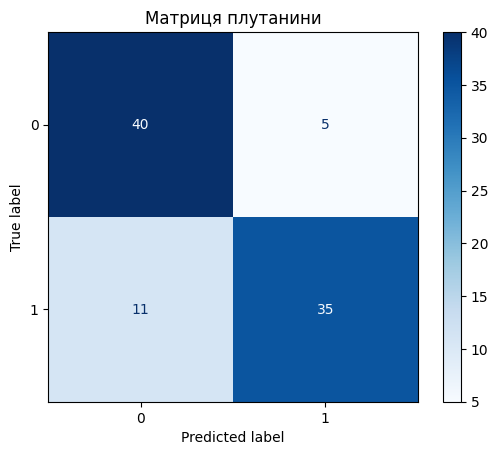

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Матриця плутанини")
plt.show()


y_pred_prob = model.predict(X_test_s).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


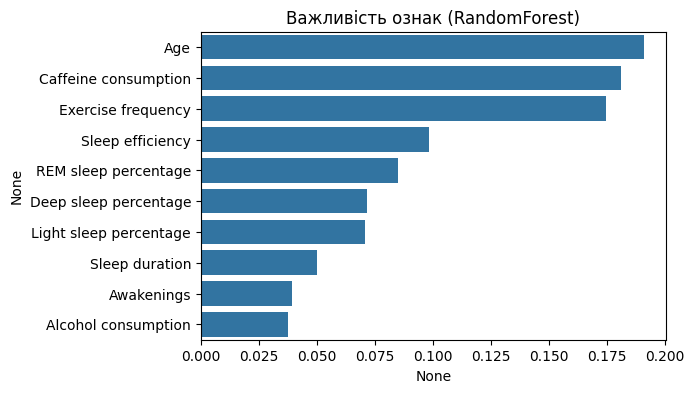

In [6]:
features = X.columns
importances = clf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Важливість ознак (RandomForest)")
plt.show()